In [53]:
#Alex Meyer Final Project

import pandas as pd
import statistics 

#DataSets
MoneyList = pd.read_csv('MoneyList ESPN.csv')
WorldRanking = pd.read_csv('World Ranking PGA.csv')
Stats1 = pd.read_csv('Stats1 ESPN.csv')
Stats2 = pd.read_csv('Stats2 ESPN.csv')
#Fedex = pd.read_csv('FedexCupPoints PGATour.csv')

MoneyList.fillna(0,inplace=True)
WorldRanking.fillna(0,inplace=True)
Stats1.fillna(0,inplace=True)
Stats2.fillna(0,inplace=True)


#Created Dataset to get a PlayerID
PlayerData = MoneyList
PlayerData = PlayerData.drop(['RK', 'Age', 'Events', 'Rounds', 'CutsMade', 'Top10s', 'Wins', 'CupPoints','Earnings'],axis=1)
PlayerData['PlayerID'] = PlayerData.index + 1
PlayerData.fillna(0,inplace=True)
PlayerData


,PlayerName,PlayerID
0,Brooks Koepka,1
1,Rory McIlroy,2
2,Matt Kuchar,3
3,Patrick Cantlay,4
4,Gary Woodland,5
...,...,...
195,Billy Hurley III,196
196,Charl Schwartzel,197
197,Nicholas Lindheim,198
198,Brady Schnell,199


In [54]:
#joins
BigData = MoneyList.merge(Stats1, on='PlayerName').merge(Stats2, on='PlayerName').merge(PlayerData,on='PlayerName')
BigData.columns
BigData = BigData.drop(['RK_x',  'Age_x', 'RK_y', 'Age_y',  'RK'],axis=1)
BigData


,PlayerName,Events,Rounds,CutsMade,Top10s,Wins,CupPoints,Earnings,YardsPerDrive,DrivingAcc,...,PuttAvg,SavePct,Age,Eagles,Birdies,Pars,Bogeys,BirdiesPerRound,HolesPerEagle,PlayerID
0,Brooks Koepka,21,74,20,9,3,-13,9684006,309.0,61.8,...,1.752,58.4,29,15.0,317.0,820.0,155.0,4.284,89.0,1
1,Rory McIlroy,19,68,17,14,3,-18,7785286,313.5,61.8,...,1.701,55.3,30,13.0,305.0,754.0,129.0,4.485,94.0,2
2,Matt Kuchar,22,80,20,8,2,-1,6294690,289.5,67.4,...,1.748,60.8,41,7.0,321.0,923.0,170.0,4.013,206.0,3
3,Patrick Cantlay,21,72,18,9,1,1,6121488,304.7,57.3,...,1.721,58.0,28,5.0,317.0,811.0,144.0,4.403,259.0,4
4,Gary Woodland,24,84,21,8,1,-2,5690965,308.2,63.4,...,1.759,50.4,35,10.0,368.0,900.0,206.0,4.381,151.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Whee Kim,27,69,9,1,0,118,292773,284.3,62.1,...,1.780,45.5,28,2.0,250.0,766.0,188.0,3.623,621.0,187
177,Hunter Mahan,0,59,8,0,0,141,287579,295.7,65.6,...,1.764,46.6,37,7.0,211.0,671.0,149.0,3.576,152.0,188
178,Kyle Jones,0,66,10,0,0,133,277762,284.0,68.6,...,1.801,39.0,26,5.0,216.0,773.0,172.0,3.273,238.0,190
179,Cody Gribble,0,66,11,0,0,111,248317,297.2,53.6,...,1.743,41.3,29,12.0,229.0,714.0,196.0,3.470,99.0,195


In [55]:
#GroupBy
BigData.groupby('Age').agg({'Wins':[sum]})

,Wins
,sum
Age,
--,0
21,0
22,0
23,0
24,1
25,1
26,5
27,0


In [56]:
#function1
def AvgWinnings(PID):
    myRow = BigData.loc[BigData['PlayerID']==PID]
    AvgWIn = myRow['Earnings']/ myRow['Events']
    return AvgWIn

AvgWinnings(5)

4    237123.541667
dtype: float64

In [57]:
#Function2
def HasHeWon(PID):
    myRow = BigData.loc[BigData['PlayerID']==PID]
    Wins = int(myRow['Wins'])
    if Wins > 0.5:
        print ('Winner')
    else:
        print ('Loser')

HasHeWon(9)
HasHeWon(10)
    

Winner
Loser


In [58]:
#Model 1
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

ColList = ['Events','CutsMade','YardsPerDrive','DrivingAcc','GreensInReg','PuttAvg','SavePct','BirdiesPerRound']

X=BigData[ColList]
y=BigData['Top10s']

Xtrain, Xtest, ytrain,  ytest = train_test_split(X,y, random_state=1430)
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,ytrain)
model.score(Xtrain,ytrain)
model.score(Xtest,ytest)


0.561025985130777

In [68]:
#Model2
ColList = ['Events','CutsMade','Top10s','Wins','YardsPerDrive','DrivingAcc','DriveTotal','GreensInReg','PuttAvg','SavePct','BirdiesPerRound','HolesPerEagle']
X= BigData[ColList]
y=BigData['Earnings']

Xtrain, Xtest, ytrain,  ytest = train_test_split(X,y, random_state=432)
model2 = LinearRegression(fit_intercept=True)
model2.fit(Xtrain,ytrain)
model2.score(Xtrain,ytrain)
model2.score(Xtest,ytest)

0.9166002844711553

In [67]:
#Model3
ColList = ['YardsPerDrive','DrivingAcc','DriveTotal','GreensInReg','PuttAvg','SavePct']
X= BigData[ColList]
y=BigData['BirdiesPerRound']

Xtrain, Xtest, ytrain,  ytest = train_test_split(X,y, random_state=12)
model2 = LinearRegression(fit_intercept=True)
model2.fit(Xtrain,ytrain)
model2.score(Xtrain,ytrain)
model2.score(Xtest,ytest)

0.800888880351207

In [78]:
#Metrics
#Most wins
BigData['Wins'].max()

#Average Earnings
BigData['Earnings'].mean()

#Most Events PLayed
BigData['Events'].max()

#Longest DRiver
BigData['YardsPerDrive'].max()

#Least puuts
BigData['PuttAvg'].min()

1.694

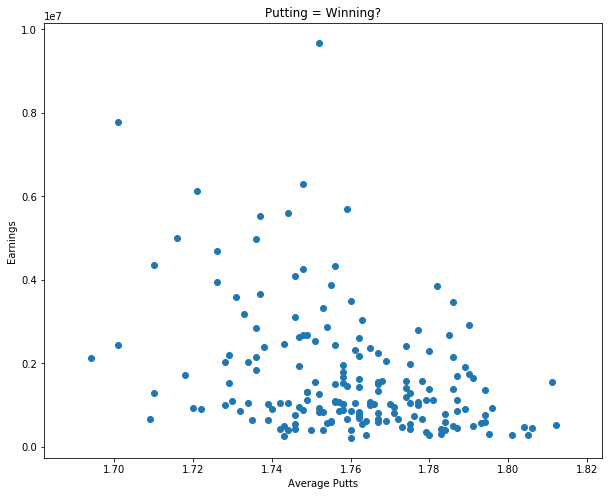

In [82]:
#Graphs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

plt.scatter('PuttAvg','Earnings', data = BigData)
plt.title('Putting = Winning?')
plt.xlabel('Average Putts')
plt.ylabel('Earnings');



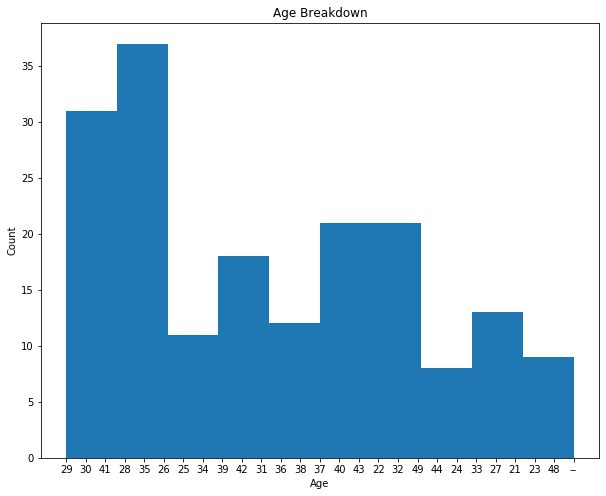

In [85]:
plt.figure(figsize=(10,8))
plt.hist('Age', data = BigData);
plt.title('Age Breakdown')
plt.xlabel('Age')
plt.ylabel('Count');

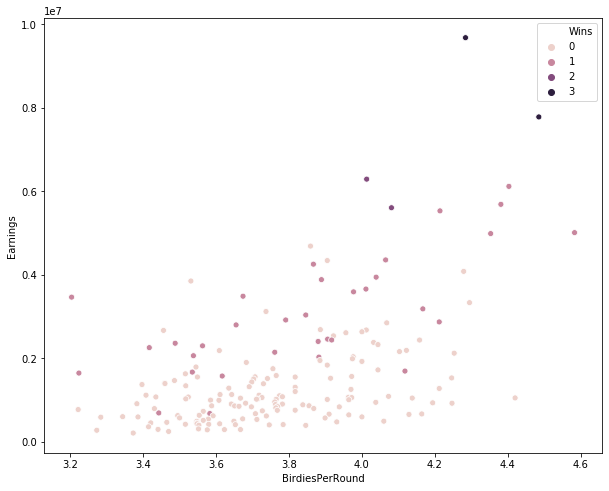

In [90]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.scatterplot(x='BirdiesPerRound',y='Earnings',hue='Wins', data =BigData);